## 说明
目前做meta分析的代码,neurosynth的脚本有很多bug，已经不再维护，官方团队推荐使用NIMARE软件
https://github.com/neurostuff/NiMARE/tree/main/docs

In [4]:
# # set root dir,
# root_dir = '/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article'
import pandas as pd
# from pylab import text
# from scipy.stats import entropy
# from scipy.stats import ttest_rel
# from scipy import interpolate
# import scipy.io as sio
# import scipy.stats
# import numpy as np
# import os
# import sys
# import glob
# import matplotlib.pyplot as plt
# import matplotlib
# import seaborn as sns
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from scipy.stats import mannwhitneyu, normaltest
# import seaborn as sns
# import joypy
# from pcntoolkit.normative import estimate, evaluate
# from pcntoolkit.util.utils import create_bspline_basis, compute_MSLL
# from scipy import interpolate
# from sklearn import svm
# from sklearn.metrics import auc
# from sklearn.metrics import plot_roc_curve
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# import re

# # ANOVA
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from bioinfokit.analys import stat # post hoc
# # boxplot with sig
# from statannotations.Annotator import Annotator
# sys.path.append(root_dir + '/Pipeline/Statistics/statannotations-tutorials-main/Tutorial_1')
# import utils
# from utils import *

# # https://statannotations.readthedocs.io/en/latest/statannotations.stats.html

# script_path = root_dir + '/Pipeline'

# if not os.path.exists(script_path):
#     script_path = '/data/disk2/luojunhao/Project/PT_HG_PR/PT_Individualized_Prediction/Prediction/dsPrediction/Prediction/Pipeline'
#     print('Work platform: gonglab server')
# else:
#     print('Work platform: luojunjao MAC')

# sys.path.append(script_path + '/Statistics')
# sys.path.append(script_path + '/io_')
# import plot_
# import io_

# # 及时清除notebook输出，防止文件太大打不开或者后续编辑卡顿
# from IPython.display import clear_output

# # scipy.stats.ttest_rel(df['LPAC_MeanSM_tMean'], df['RPAC_MeanSM_tMean']) 配对t检验
# #tstat, pval = stats.ttest_ind(ps1, ps2, alternative="two-sided") 双样本t检验

# # save df as a png
# import dataframe_image as dfi
# dfi.export(T, "T.png")

In [5]:

from nilearn import image, masking, plotting

from nimare import annotate, decode
from nimare.dataset import Dataset
from nimare.utils import get_resource_path

In [6]:
import nimare
## nimare 0.0.14比较稳定, pandas 1.5.3
# 最新版 nimare需要pandas 2.0.0以上，会报奇怪的错误

In [4]:
import os
from pprint import pprint

from nimare.extract import download_abstracts, fetch_neuroquery, fetch_neurosynth
from nimare.io import convert_neurosynth_to_dataset

# biopython is unnecessary here, but is required by download_abstracts.
# We import it here only to document the dependency and cause an early failure if it's missing.
import Bio  # pip install biopython
import nimare

## 1.生成meta分析数据集

In [58]:
# 生成数据集
import os
from pprint import pprint

import nimare

out_dir = os.path.abspath('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828')
os.makedirs(out_dir, exist_ok=True)


# Fetch Neurosynth with *just* the LDA50 features
files = nimare.extract.fetch_neurosynth(
    data_dir=out_dir,  # version 0.0.10 switched to data directory
    version="7",
    overwrite=False,
    source="abstract",
    vocab="terms",  # Note the difference here, or vocab="term"
    #vocab="LDA50",  # Note the difference here, or vocab="terms"
)
neurosynth_db = files[0]
pprint(neurosynth_db)
# Note the "keys" file. That has the top 30 words for each topic.
# It *doesn't* go in the Dataset at all though.

# Get the Dataset object
neurosynth_dset = nimare.io.convert_neurosynth_to_dataset(
    coordinates_file=neurosynth_db["coordinates"],
    metadata_file=neurosynth_db["metadata"],
    annotations_files=neurosynth_db["features"],
)
# save
# neurosynth_dset.save(os.path.join(out_dir, "neurosynth_dataset.pkl.gz"))
# print(neurosynth_dset)


INFO:nimare.extract.utils:Dataset created in /Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth
INFO:nimare.extract.extract:Searching for any feature files matching the following criteria: [('source-abstract', 'vocab-terms', 'data-neurosynth', 'version-7')]


{'coordinates': '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth/data-neurosynth_version-7_coordinates.tsv.gz',
 'features': [{'features': '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth/data-neurosynth_version-7_vocab-terms_source-abstract_type-tfidf_features.npz',
               'vocabulary': '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth/data-neurosynth_version-7_vocab-terms_vocabulary.txt'}],
 'metadata': '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth/data-neurosynth_version-7_metadata.tsv.gz'}


In [59]:
neurosynth_dset.save(os.path.join(out_dir, "neurosynth_dataset.pkl.gz"))
print(neurosynth_dset)

Dataset(14371 experiments, space='mni152_2mm')


In [60]:
# add abstract
neurosynth_dset = download_abstracts(neurosynth_dset, "junhaol@mail.bnu.edu.cn")
neurosynth_dset.save(os.path.join(out_dir, "neurosynth_dataset_with_abstracts.pkl.gz"))

INFO:nimare.extract.extract:Downloading chunk 1 of 16
INFO:nimare.extract.extract:Downloading chunk 2 of 16
INFO:nimare.extract.extract:Downloading chunk 3 of 16
INFO:nimare.extract.extract:Downloading chunk 4 of 16
INFO:nimare.extract.extract:Downloading chunk 5 of 16
INFO:nimare.extract.extract:Downloading chunk 6 of 16
INFO:nimare.extract.extract:Downloading chunk 7 of 16
INFO:nimare.extract.extract:Downloading chunk 8 of 16
INFO:nimare.extract.extract:Downloading chunk 9 of 16
INFO:nimare.extract.extract:Downloading chunk 10 of 16
INFO:nimare.extract.extract:Downloading chunk 11 of 16
INFO:nimare.extract.extract:Downloading chunk 12 of 16
INFO:nimare.extract.extract:Downloading chunk 13 of 16
INFO:nimare.extract.extract:Downloading chunk 14 of 16
INFO:nimare.extract.extract:Downloading chunk 15 of 16
INFO:nimare.extract.extract:Downloading chunk 16 of 16


## 2. Dedoding

In [5]:
# load data
import pandas as pd
from neurosynth import Dataset, meta, decode, network
meta_dataset = Dataset.load('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Neurosynth_data_2023-0828/neurosynth_dataset_with_abstracts.pkl')

In [18]:
# https://github.com/neurostuff/NiMARE/tree/main/docs
# nimare使用更广泛
# https://github.com/neurostuff/NiMARE/blob/main/docs/decoding.rst
# decoding

#clusters = ['left_c1_blue', 'left_c2_green']
clusters = ['left_c3_yellow', 'left_c4_red', 'right_c1_blue','right_c2_green', 'right_c3_yellow', 'right_c4_red']

for cluster in clusters:
    file_in = '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/clusters_gifti_mask/' + cluster + '.nii.gz'
    out_csv = '/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/' + cluster + '_decoding_Top100.csv'

    ns_dset = meta_dataset
    from nimare.decode.discrete import ROIAssociationDecoder

    decoder = ROIAssociationDecoder(
       file_in,
       u=0.05,
       correction="fdr_bh",
    )
    decoder.fit(ns_dset)
    decoding_results = decoder.transform()

    # sorting for top100
    decoding_results = decoding_results.sort_values(by='r', ascending=False).head(100).reset_index(drop=False)
    decoding_results['feature'] = decoding_results['feature'].apply(lambda x : x[22::]) # remove the prefix
    decoding_results.to_csv(out_csv, index=False)

In [20]:
## view
df_l_c1_blue = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/left_c1_blue_decoding_Top100.csv')
df_l_c2_green = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/left_c2_green_decoding_Top100.csv')
df_l_c3_yellow = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/left_c3_yellow_decoding_Top100.csv')
df_l_c4_red = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/left_c4_red_decoding_Top100.csv')
                          
df_r_c1_blue = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/right_c1_blue_decoding_Top100.csv')
df_r_c2_green = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/right_c2_green_decoding_Top100.csv')
df_r_c3_yellow = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/right_c3_yellow_decoding_Top100.csv')
df_r_c4_red = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/right_c4_red_decoding_Top100.csv')





In [25]:
df_l_c1_blue.head(20)

,feature,r
0,auditory,0.130871
1,auditory cortex,0.097714
2,speech,0.091084
3,heschl,0.088988
4,sounds,0.087122
5,posterior insula,0.086732
6,heschl gyrus,0.086514
7,primary auditory,0.082630
8,listening,0.078082
9,planum,0.076757


In [26]:
df_l_c2_green.head(20)

,feature,r
0,auditory,0.321875
1,auditory cortex,0.232385
2,speech,0.200494
3,superior temporal,0.197568
4,sounds,0.196361
5,primary auditory,0.169570
6,listening,0.163696
7,sound,0.155098
8,planum,0.152795
9,heschl,0.151296


In [27]:
df_l_c3_yellow.head(20)

,feature,r
0,auditory,0.275706
1,superior temporal,0.218522
2,speech,0.212569
3,auditory cortex,0.186406
4,sounds,0.172366
5,temporal,0.161245
6,listening,0.152966
7,temporale,0.145295
8,planum temporale,0.145295
9,planum,0.144454


In [28]:
df_l_c4_red.head(20)

,feature,r
0,auditory,0.307312
1,auditory cortex,0.223360
2,superior temporal,0.177803
3,sounds,0.177007
4,speech,0.174565
5,primary auditory,0.170988
6,sound,0.168659
7,planum,0.165379
8,planum temporale,0.160583
9,temporale,0.160583


In [29]:
df_r_c1_blue.head(20)

,feature,r
0,posterior insula,0.100563
1,insula,0.090297
2,auditory,0.081779
3,painful,0.076289
4,auditory cortex,0.076028
5,pain,0.071897
6,primary auditory,0.055964
7,stimulation,0.054962
8,sound,0.053293
9,sounds,0.051575


In [30]:
df_r_c2_green.head(20)

,feature,r
0,auditory,0.289243
1,auditory cortex,0.200028
2,speech,0.173248
3,sounds,0.171831
4,superior temporal,0.170980
5,sound,0.140535
6,listening,0.139327
7,planum,0.133913
8,heschl,0.130677
9,heschl gyrus,0.129252


In [31]:
df_r_c3_yellow.head(20)

,feature,r
0,auditory,0.205887
1,superior temporal,0.146587
2,temporale,0.130308
3,planum temporale,0.130308
4,planum,0.128858
5,auditory cortex,0.119512
6,sound,0.105625
7,sounds,0.105129
8,pitch,0.103353
9,speech,0.102018


In [32]:
df_r_c4_red.head(20)

,feature,r
0,auditory,0.250891
1,auditory cortex,0.175379
2,superior temporal,0.138085
3,speech,0.136479
4,sounds,0.129352
5,primary auditory,0.123931
6,sound,0.119616
7,heschl gyrus,0.115967
8,heschl,0.115077
9,planum,0.114448


In [59]:
## the term_key_words
# 取 每个cluster Top30中出现的有效认知term
# l_c1_term = ['auditory', 'speech', 'sounds', 'listening', 'sensory', 'music', 'pain', 'pitch', 'speech production', 'pressure']
# l_c2_term = ['auditory', 'speech', 'sounds', 'listening','pitch']
# l_c3_term = ['auditory', 'speech', 'sounds', 'listening','spoken']
# l_c4_term = ['auditory', 'speech', 'sounds', 'listening','spoken']


# top representative terms

top_terms = ['auditory','speech', 'sounds', 'listening', 'pitch','music', 'spoken', 'sensory', 'speech production','speech perception','noise' ,'pain']

df_l = pd.DataFrame(columns=top_terms, index=['cluster_blue','cluster_red', 'cluster_green','cluster_yellow'])
df_r = pd.DataFrame(columns=top_terms, index=['cluster_blue','cluster_red', 'cluster_green','cluster_yellow'])






In [64]:
for term in top_terms:
    
    # left
    try:
        df_l.loc['cluster_blue'][term] = df_l_c1_blue[df_l_c1_blue['feature']==term]['r'].to_numpy()[0]     
    except:
        df_l.loc['cluster_blue'][term] = 0 # no this term, add zero
    
    try:
        df_l.loc['cluster_red'][term] = df_l_c4_red[df_l_c4_red['feature']==term]['r'].to_numpy()[0]     
    except:
        df_l.loc['cluster_red'][term] = 0 # no this term, add zero
    
    try:
        df_l.loc['cluster_green'][term] = df_l_c2_green[df_l_c2_green['feature']==term]['r'].to_numpy()[0]     
    except:
        df_l.loc['cluster_green'][term] = 0 # no this term, add zero
    
    try:
        df_l.loc['cluster_yellow'][term] = df_l_c3_yellow[df_l_c3_yellow['feature']==term]['r'].to_numpy()[0]     
    except:
        df_l.loc['cluster_yellow'][term] = 0 # no this term, add zero
    
    
    
    # right
    try:
        df_r.loc['cluster_blue'][term] = df_r_c1_blue[df_r_c1_blue['feature']==term]['r'].to_numpy()[0]     
    except:
        df_r.loc['cluster_blue'][term] = 0 # no this term, add zero
    
    try:
        df_r.loc['cluster_red'][term] = df_r_c4_red[df_r_c4_red['feature']==term]['r'].to_numpy()[0]     
    except:
        df_r.loc['cluster_red'][term] = 0 # no this term, add zero
    
    try:
        df_r.loc['cluster_green'][term] = df_r_c2_green[df_r_c2_green['feature']==term]['r'].to_numpy()[0]     
    except:
        df_r.loc['cluster_green'][term] = 0 # no this term, add zero
    
    try:
        df_r.loc['cluster_yellow'][term] = df_r_c3_yellow[df_r_c3_yellow['feature']==term]['r'].to_numpy()[0]     
    except:
        df_r.loc['cluster_yellow'][term] = 0 # no this term, add zero
    
  
    

In [65]:
df_l

,auditory,speech,sounds,listening,pitch,music,spoken,sensory,speech production,speech perception,noise,pain
cluster_blue,0.130871,0.091084,0.087122,0.078082,0.050362,0.052103,0,0.061903,0.049939,0.034885,0.042489,0.050995
cluster_red,0.307312,0.174565,0.177007,0.148309,0.100344,0.093186,0.080539,0.090661,0.070442,0.075752,0.075738,0
cluster_green,0.321875,0.200494,0.196361,0.163696,0.122149,0.107697,0.09778,0.090135,0.082509,0.076785,0.086619,0
cluster_yellow,0.275706,0.212569,0.172366,0.152966,0.110158,0.066981,0.127304,0.06159,0.086721,0.085842,0.061615,0


In [66]:
df_r

,auditory,speech,sounds,listening,pitch,music,spoken,sensory,speech production,speech perception,noise,pain
cluster_blue,0.081779,0.049129,0.051575,0.040783,0.047773,0,0,0.032565,0,0,0.023246,0.071897
cluster_red,0.250891,0.136479,0.129352,0.104551,0.09346,0.069649,0.074184,0.088247,0.060499,0.049456,0.059839,0.058416
cluster_green,0.289243,0.173248,0.171831,0.139327,0.108866,0.11193,0.097531,0.086264,0.075261,0.066118,0.072621,0.045674
cluster_yellow,0.205887,0.102018,0.105129,0.070925,0.103353,0.051288,0.051254,0.065419,0.046813,0.041079,0.062029,0.032709


In [54]:
term = 'auditory'
df_l.iloc[0][1] = df_l_c1_blue[df_l_c1_blue['feature']==term]['r'].to_numpy()[0]

In [68]:
df_l.to_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/left_key_terms_r.csv', index = True)

df_r.to_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/neurosynth_decoding/right_key_terms_r.csv', index = True)



## 3. Plot for decoding

### word cloud

In [ ]:
df_d = ''

In [ ]:
# word clound with frequency
def plot_word_cloud(df_d)

d = {}
for a, x in df_d.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,8), dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### filtering for decoding

In [202]:
df_l = pd.read_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/LW_Decoding.csv')
df_r = pd.read_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/RW_Decoding.csv')

In [203]:
# remove r < 0
df_lp = df_l[df_l['r']>0].reset_index(drop=True)
df_rp = df_r[df_r['r']>0].reset_index(drop=True)


In [222]:
df_lp.sort_values(by='r', ascending=False).head(10)

,feature,r
99,terms_abstract_tfidf__auditory,0.281958
1185,terms_abstract_tfidf__speech,0.199368
1238,terms_abstract_tfidf__superior temporal,0.195111
100,terms_abstract_tfidf__auditory cortex,0.190739
1166,terms_abstract_tfidf__sounds,0.179776
697,terms_abstract_tfidf__listening,0.154884
1271,terms_abstract_tfidf__temporal,0.147653
1165,terms_abstract_tfidf__sound,0.133111
959,terms_abstract_tfidf__primary auditory,0.133014
913,terms_abstract_tfidf__planum,0.132117


In [245]:
df_lp_top50 = df_lp.sort_values(by='r', ascending=False).head(50).reset_index(drop=True)
# rename feature
df_lp_top50['feature'] = df_lp_top50['feature'].apply(lambda x : x[22::])

In [249]:
df_lp_top50.to_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/LW_Decoding_top50.csv',index=False)
df_rp_top50.to_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/RW_Decoding_top50.csv',index=False)

In [247]:
df_rp_top50 = df_rp.sort_values(by='r', ascending=False).head(50).reset_index(drop=True)
# rename feature
df_rp_top50['feature'] = df_rp_top50['feature'].apply(lambda x : x[22::])

In [248]:
df_rp_top50

,feature,r
0,auditory,0.235391
1,superior temporal,0.173288
2,speech,0.172195
3,sounds,0.152129
4,auditory cortex,0.149760
5,listening,0.130181
6,temporal,0.129798
7,sound,0.113693
8,planum,0.110424
9,superior,0.108928


## df_rp.sort_values(by='r', ascending=False).head(10)

Text(0.5, 1.0, 'LPAC sig. modelmap for speech perception, total=1397, fdr_q=0.05')

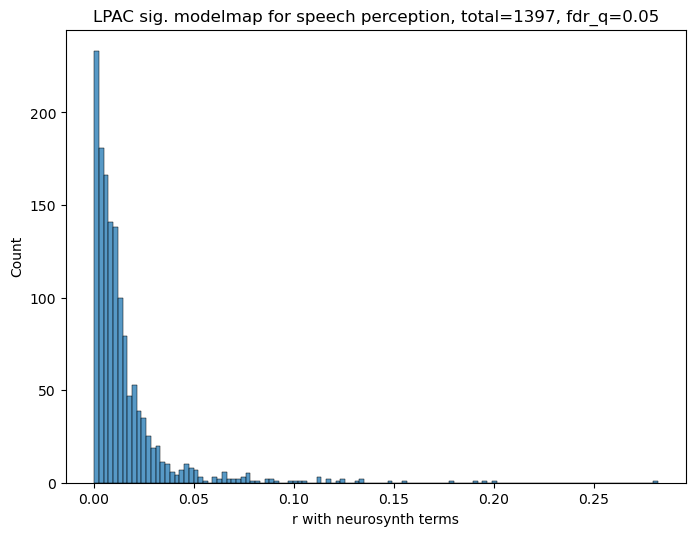

In [221]:
plt.figure(figsize=(8,6),dpi=100)
sns.histplot(df_lp['r'])
plt.xlabel('r with neurosynth terms')
plt.title('LPAC sig. modelmap for speech perception, total=1397, fdr_q=0.05')

### 绘制词云图

In [259]:
df_lt = pd.read_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/LW_Decoding_top50_filtering.csv')
df_rt = pd.read_csv('/Users/fiona/OneDrive - mail.bnu.edu.cn/Project/Prediction/Article/Result/Neurosynth/Decoding/Model_weights_map/RW_Decoding_top50_filtering.csv')

In [299]:
# word clound with frequency
def plot_word_cloud(df_d):
    d = {}
    for a, x in df_d.values:
        d[a] = x

    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    #wordcloud = WordCloud(width=1000, height=600, max_words=100,
                         #background_color='gray')
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(8,6), dpi=500)
    plt.imshow(wordcloud, interpolation="bilinear", vmin=None, vmax=None)
    plt.colorbar(location = 'bottom')
    plt.axis("off")
    plt.show()

In [98]:
!pip install pandas --upgrade

In [99]:
import pandas as pd

In [5]:
print(pd.__version__)

2.0.3


In [6]:
print(nimare.__version__)

0.1.1


# t-sne

In [96]:
import glob
import sklearn
import scipy.io as sio
from scipy.spatial.distance import squareform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mne_connectivity.viz import plot_connectivity_circle
from mne.viz import circular_layout

In [71]:
df1 = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/cluster_fingerprint/fingerprint/fingerprint_rest1_left_mean_cluster.csv')
df2 = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/cluster_fingerprint/fingerprint/fingerprint_rest1_right_mean_cluster.csv')
x1 = df1.iloc[:,1:18]
x2 = df2.iloc[:,1:18]
x = pd.concat([x1,x2])
X = x.to_numpy()
y = ['cl-1','cl-2','cl-3','cl-4','cr-1','cr-2','cr-3','cr-4']
y1 = ['cl-1','cl-2','cl-3','cl-4']

In [82]:
x1[1:3,:].shape

(2, 18)

/Users/fiona/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/fiona/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


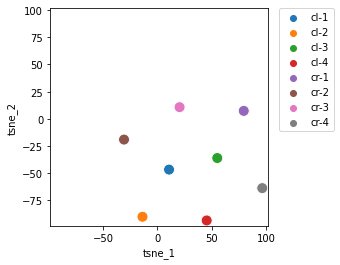

In [109]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
# X = x1
# y = y1
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
#ax = plt.figure(figsize=(10,8), dpi=300)
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


ValueError: cannot reshape array of size 16 into shape (1000,2)

In [119]:
X.shape

(8, 17)

In [129]:
from scipy import stats
res = stats.spearmanr(X.transpose(), X.transpose())
#res.statistic

In [133]:
res.correlation

array([[1.        , 0.99019608, 0.91176471, 0.9877451 , 0.9754902 ,
        0.9877451 , 0.93137255, 0.99264706, 1.        , 0.99019608,
        0.91176471, 0.9877451 , 0.9754902 , 0.9877451 , 0.93137255,
        0.99264706],
       [0.99019608, 1.        , 0.93137255, 0.99509804, 0.9754902 ,
        0.99754902, 0.96078431, 0.99754902, 0.99019608, 1.        ,
        0.93137255, 0.99509804, 0.9754902 , 0.99754902, 0.96078431,
        0.99754902],
       [0.91176471, 0.93137255, 1.        , 0.91911765, 0.94117647,
        0.93382353, 0.97058824, 0.92401961, 0.91176471, 0.93137255,
        1.        , 0.91911765, 0.94117647, 0.93382353, 0.97058824,
        0.92401961],
       [0.9877451 , 0.99509804, 0.91911765, 1.        , 0.96323529,
        0.99264706, 0.95343137, 0.99754902, 0.9877451 , 0.99509804,
        0.91911765, 1.        , 0.96323529, 0.99264706, 0.95343137,
        0.99754902],
       [0.9754902 , 0.9754902 , 0.94117647, 0.96323529, 1.        ,
        0.97058824, 0.94117647, 

In [127]:
X

array([[-6.29580422e-02, -7.15047931e-02, -6.01941628e-02,
        -5.85218498e-02, -8.88326232e-02, -8.84974671e-02,
         2.05695978e-02,  1.08439640e-02,  1.55413922e-01,
         5.99342264e-02, -2.27334221e-02,  2.82053525e-01,
         2.30005800e-01,  2.30907216e-01, -2.52866229e-02,
         6.72188500e-02,  4.27342814e-03],
       [-5.49656607e-02, -8.68460655e-02, -6.57884745e-02,
        -5.39324085e-02, -8.69721862e-02, -6.65006490e-02,
         5.26055892e-02,  1.60665879e-02,  1.57486348e-01,
         5.97308256e-02, -2.47019113e-03,  5.22805859e-01,
         2.46329916e-01,  1.99291646e-01, -2.71102868e-02,
         6.54659540e-02,  3.24530014e-02],
       [-4.58132105e-02, -5.61673155e-02, -5.68258550e-02,
        -7.96103400e-02, -6.95656744e-02, -4.31894482e-02,
         9.22193460e-02, -1.96941662e-04,  1.33106637e-01,
         9.03645396e-02,  2.42305934e-02,  4.66123056e-01,
         2.37021338e-01,  2.02206251e-01, -4.06511926e-02,
         5.80164660e-02,  8.0

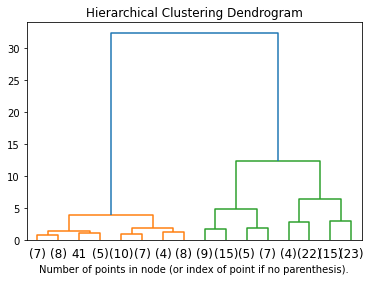

In [134]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data

# # setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# model = model.fit(X)
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

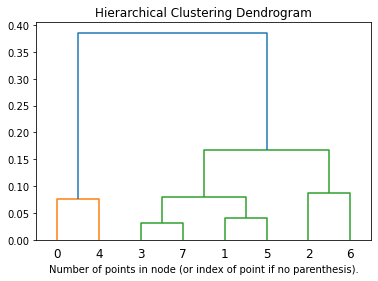

In [138]:
# iris = load_iris()
# X = iris.data
df1 = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/cluster_fingerprint/fingerprint/fingerprint_rest1_left_mean_cluster.csv')
df2 = pd.read_csv('/Users/fiona/Library/CloudStorage/OneDrive-mail.bnu.edu.cn/Project/PAC_Individual_difference/result/stats/clustering/cluster_fingerprint/fingerprint/fingerprint_rest1_right_mean_cluster.csv')
x1 = df1.iloc[:,1:18]
x2 = df2.iloc[:,1:18]
x = pd.concat([x1,x2])
X = x.to_numpy()
y = ['cl-1','cl-2','cl-3','cl-4','cr-1','cr-2','cr-3','cr-4']
y1 = ['cl-1','cl-2','cl-3','cl-4']

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

SyntaxError: invalid syntax (1068564517.py, line 1)

In [141]:
model.distances_

array([0.03181953, 0.04145088, 0.07659021, 0.07954299, 0.0866836 ,
       0.16725489, 0.38570103])

In [7]:
nimare.__version__


'0.0.14'